Cài đặt thư viện

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import seaborn as sns

Đọc dữ liệu

In [2]:
# Đọc file CSV và chuyển thành DataFrame
data = pd.read_csv("/content/Hotel Reservations.csv")
data.head(10)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
5,INN00006,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,2018,9,13,Online,0,0,0,115.00,1,Canceled
6,INN00007,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,2017,10,15,Online,0,0,0,107.55,1,Not_Canceled
7,INN00008,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,2018,12,26,Online,0,0,0,105.61,1,Not_Canceled
8,INN00009,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,2018,7,6,Offline,0,0,0,96.90,1,Not_Canceled
9,INN00010,2,0,0,5,Meal Plan 1,0,Room_Type 4,44,2018,10,18,Online,0,0,0,133.44,3,Not_Canceled


Overview dữ liệu

In [3]:
data.shape

(36275, 19)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   



*   Booking_ID: ID của booking
*   no_of_adults: Số lượng người lớn
*   no_of_children: Số lượng trẻ em
*   no_of_weekend_nights: Số đêm cuối tuần đã ở hay đã đăt để ở tại khách sạn (Thứ 7 hoặc chủ nhật)
*   no_of_week_nights: Số đêm cuối tuần đã ở hay đã đăt để ở tại khách sạn
(từ thứ hai đến thứ 6)
*   type_of_meal_plan: Loại kế hoạch ăn uống được đặt bởi khách hàng
*   required_car_parking_space: Khách hàng có yêu cầu chỗ đậu xem hay là không.
*   room_type_reserved: Loại phòng được đặt bởi khách hàng
*   lead_time: Số ngày từ ngày đặt đến ngày chuyển đến khách sạn
*   arrival_year: Năm của ngày chuyển đến
*   arrival_month: Tháng của ngày chuyển đến
*   arrival_date: Ngày của tháng chuyển đến
*   market_segment_type: Chỉ định phân khúc thị trường
*   repeated_guest: Có phải khách hàng cũ hay không.
*   no_of_previous_cancellations: Số lượng lần đặt bị hủy của khách trước đó
*   no_of_previous_booking_not_cancelled: Số lượng lần đặt không bị hủy của khách trước đó
*   avg_price_per_room: Giá trung bình mỗi ngày của phòng đặt, giá phòng là linh động
*   no_of_special_requests: Số lượng yêu cầu đặt biệt của khách hàng
*   booking_status: Đặt phòng bị hủy hay không bị hủy





In [5]:
data.describe(include = "all")

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
count,36275,36275.000000,36275.000000,36275.000000,36275.000000,36275,36275.000000,36275,36275.000000,36275.000000,36275.000000,36275.000000,36275,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275
unique,36275,NaN,NaN,NaN,NaN,4,NaN,7,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,2
top,INN00001,NaN,NaN,NaN,NaN,Meal Plan 1,NaN,Room_Type 1,NaN,NaN,NaN,NaN,Online,NaN,NaN,NaN,NaN,NaN,Not_Canceled
freq,1,NaN,NaN,NaN,NaN,27835,NaN,28130,NaN,NaN,NaN,NaN,23214,NaN,NaN,NaN,NaN,NaN,24390
mean,NaN,1.844962,0.105279,0.810724,2.204300,NaN,0.030986,NaN,85.232557,2017.820427,7.423653,15.596995,NaN,0.025637,0.023349,0.153411,103.423539,0.619655,NaN
std,NaN,0.518715,0.402648,0.870644,1.410905,NaN,0.173281,NaN,85.930817,0.383836,3.069894,8.740447,NaN,0.158053,0.368331,1.754171,35.089424,0.786236,NaN
min,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,0.000000,2017.000000,1.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,2.000000,0.000000,0.000000,1.000000,NaN,0.000000,NaN,17.000000,2018.000000,5.000000,8.000000,NaN,0.000000,0.000000,0.000000,80.300000,0.000000,NaN
50%,NaN,2.000000,0.000000,1.000000,2.000000,NaN,0.000000,NaN,57.000000,2018.000000,8.000000,16.000000,NaN,0.000000,0.000000,0.000000,99.450000,0.000000,NaN
75%,NaN,2.000000,0.000000,2.000000,3.000000,NaN,0.000000,NaN,126.000000,2018.000000,10.000000,23.000000,NaN,0.000000,0.000000,0.000000,120.000000,1.000000,NaN


Phân tích từng cột

no_of_adults
2    26108
1     7695
3     2317
0      139
4       16
Name: no_of_adults, dtype: int64


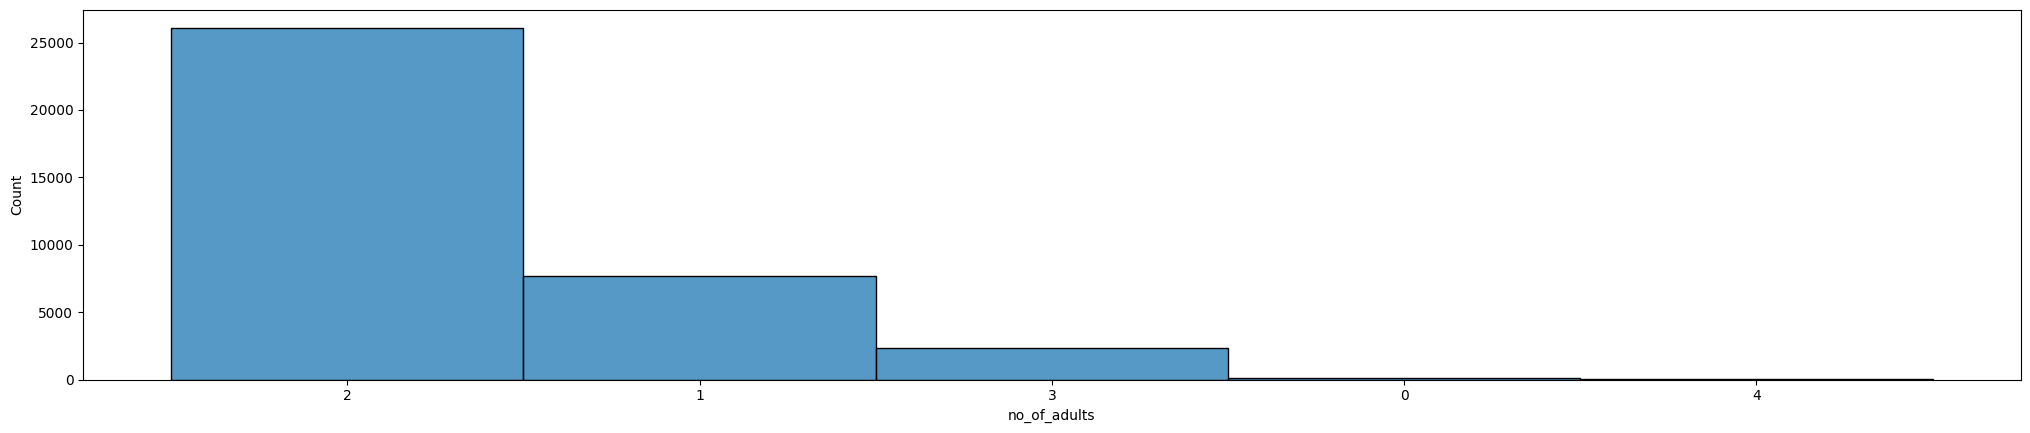

no_of_children
0     33577
1      1618
2      1058
3        19
9         2
10        1
Name: no_of_children, dtype: int64


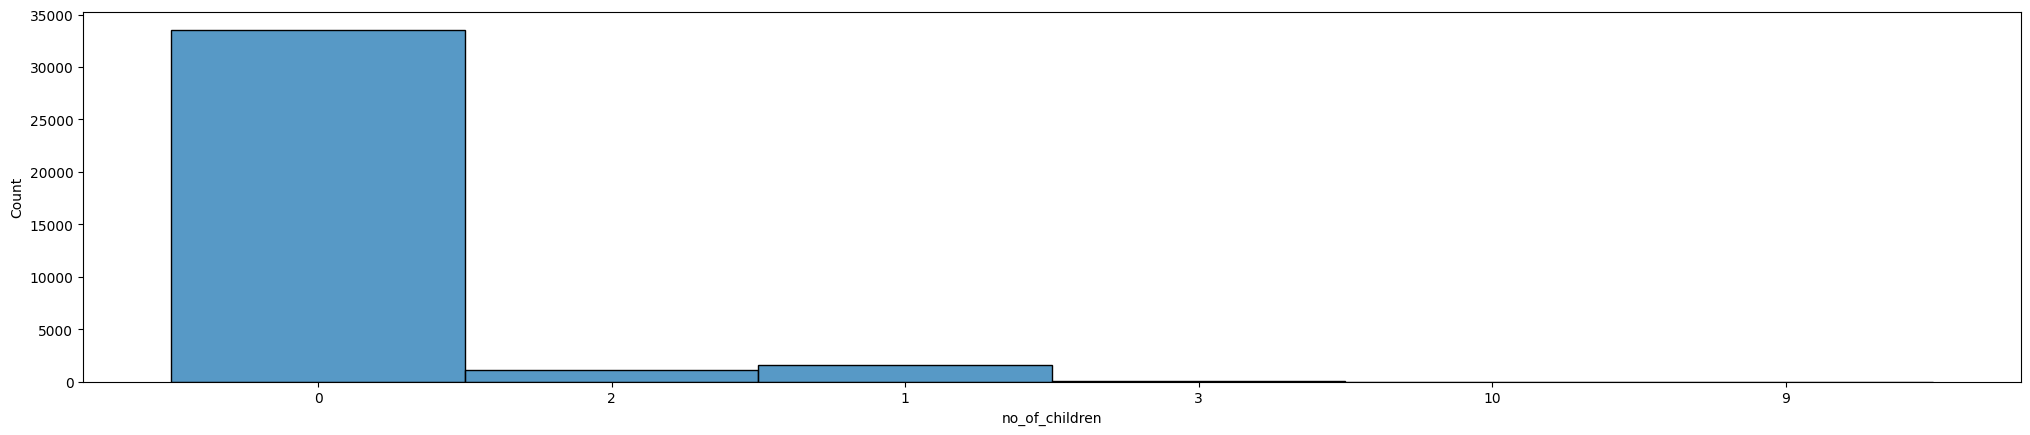

no_of_weekend_nights
0    16872
1     9995
2     9071
3      153
4      129
5       34
6       20
7        1
Name: no_of_weekend_nights, dtype: int64


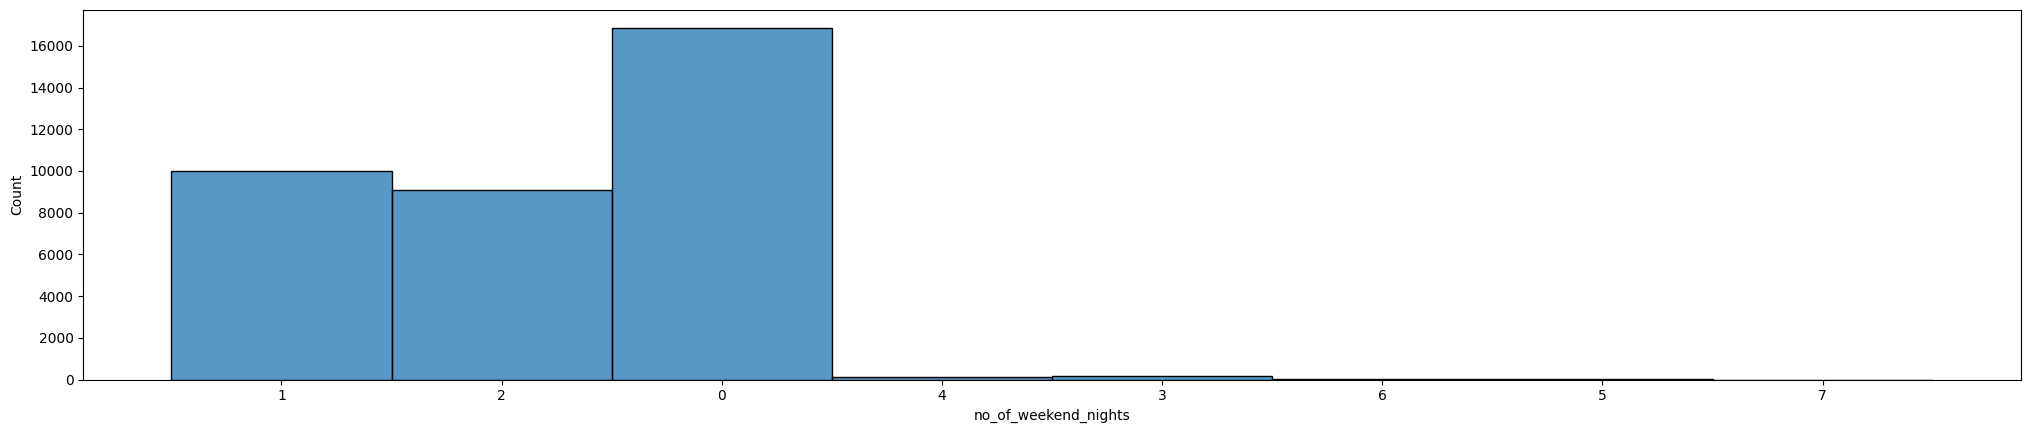

no_of_week_nights
2     11444
1      9488
3      7839
4      2990
0      2387
5      1614
6       189
7       113
10       62
8        62
9        34
11       17
15       10
12        9
14        7
13        5
17        3
16        2
Name: no_of_week_nights, dtype: int64


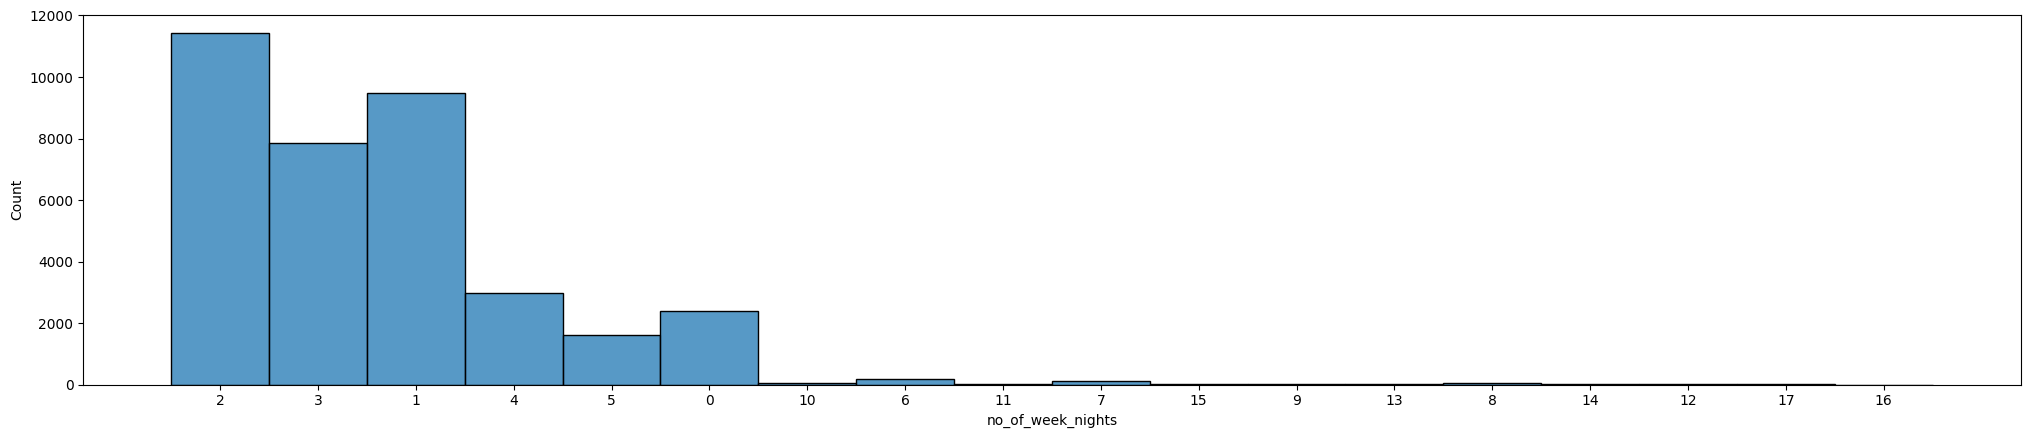

type_of_meal_plan
Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64


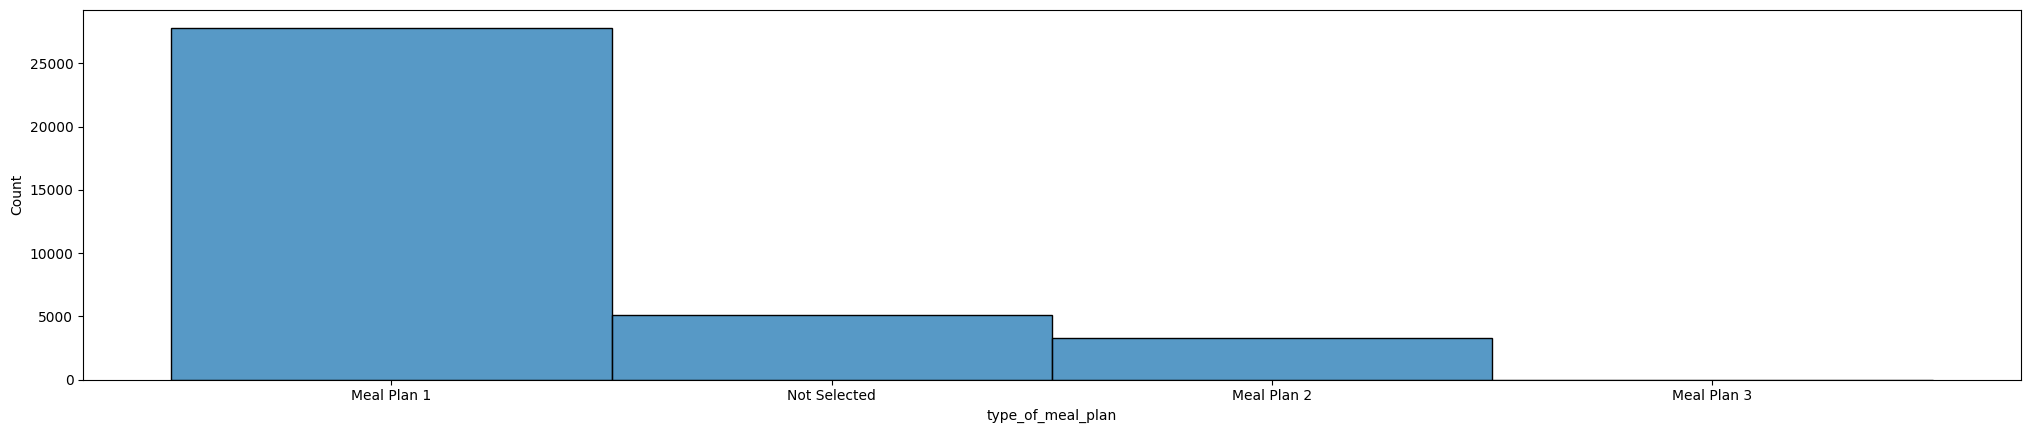

required_car_parking_space
0    35151
1     1124
Name: required_car_parking_space, dtype: int64


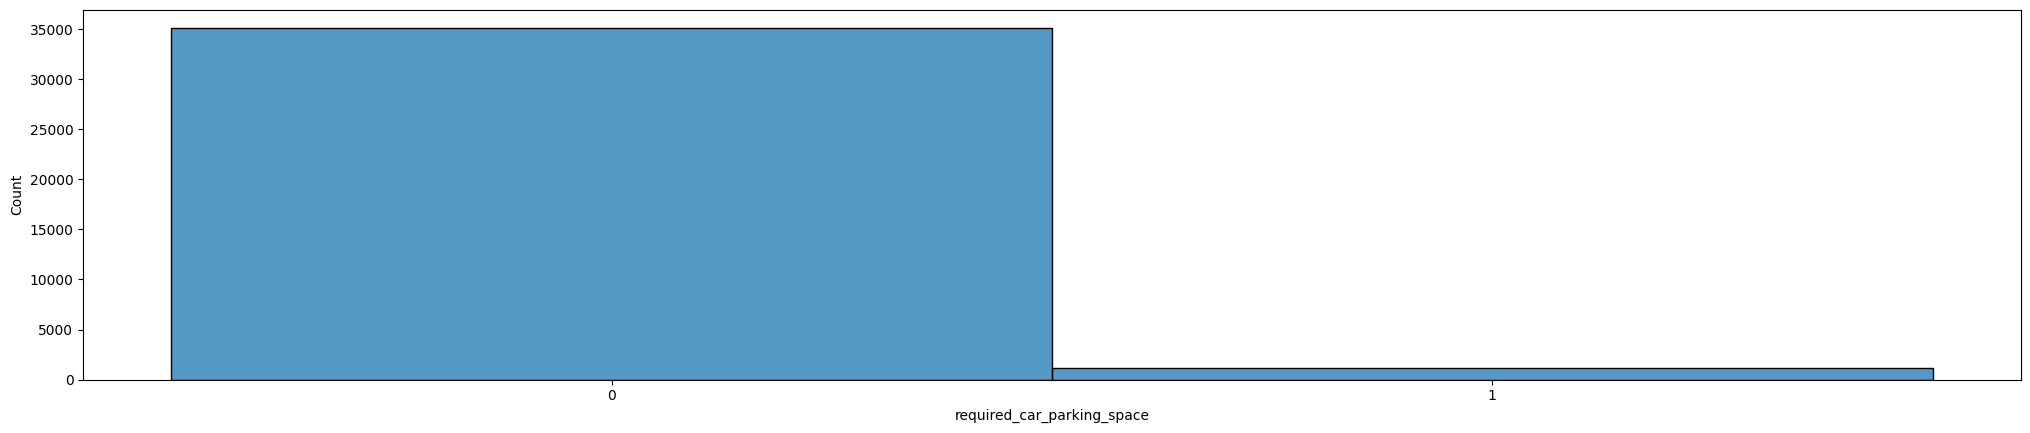

room_type_reserved
Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: room_type_reserved, dtype: int64


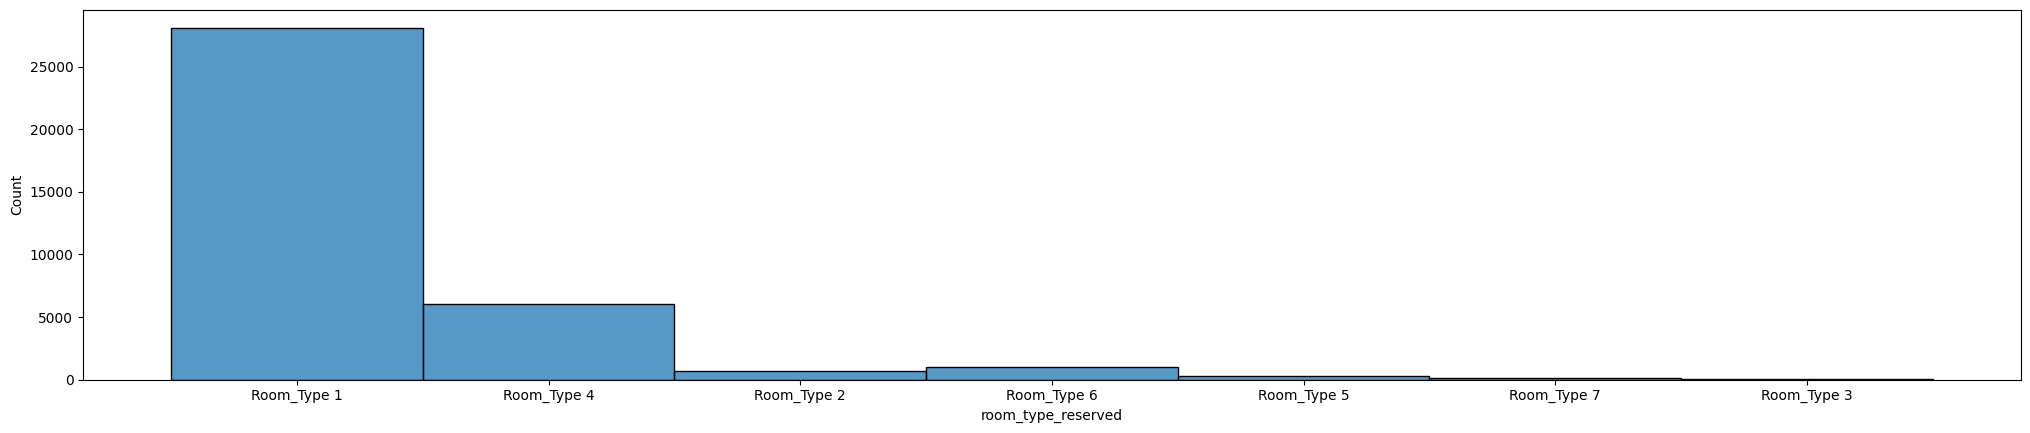

lead_time
0      1297
1      1078
2       643
3       630
4       628
       ... 
300       1
353       1
328       1
352       1
351       1
Name: lead_time, Length: 352, dtype: int64


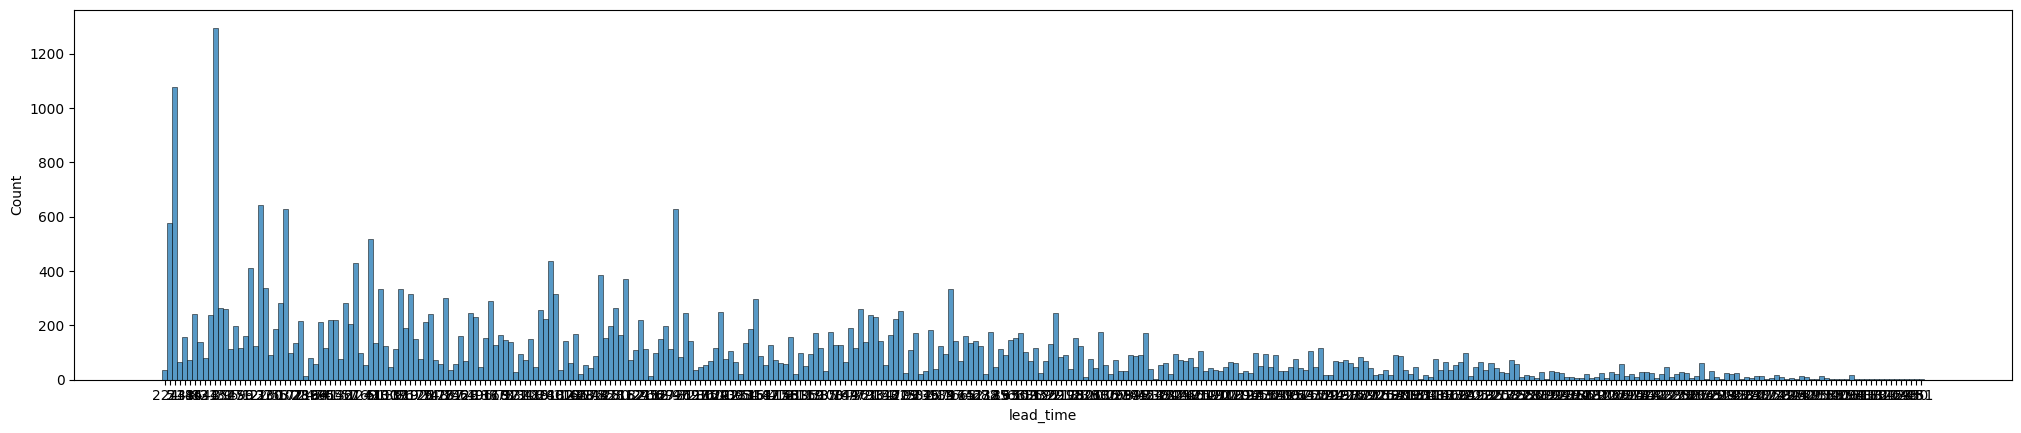

arrival_year
2018    29761
2017     6514
Name: arrival_year, dtype: int64


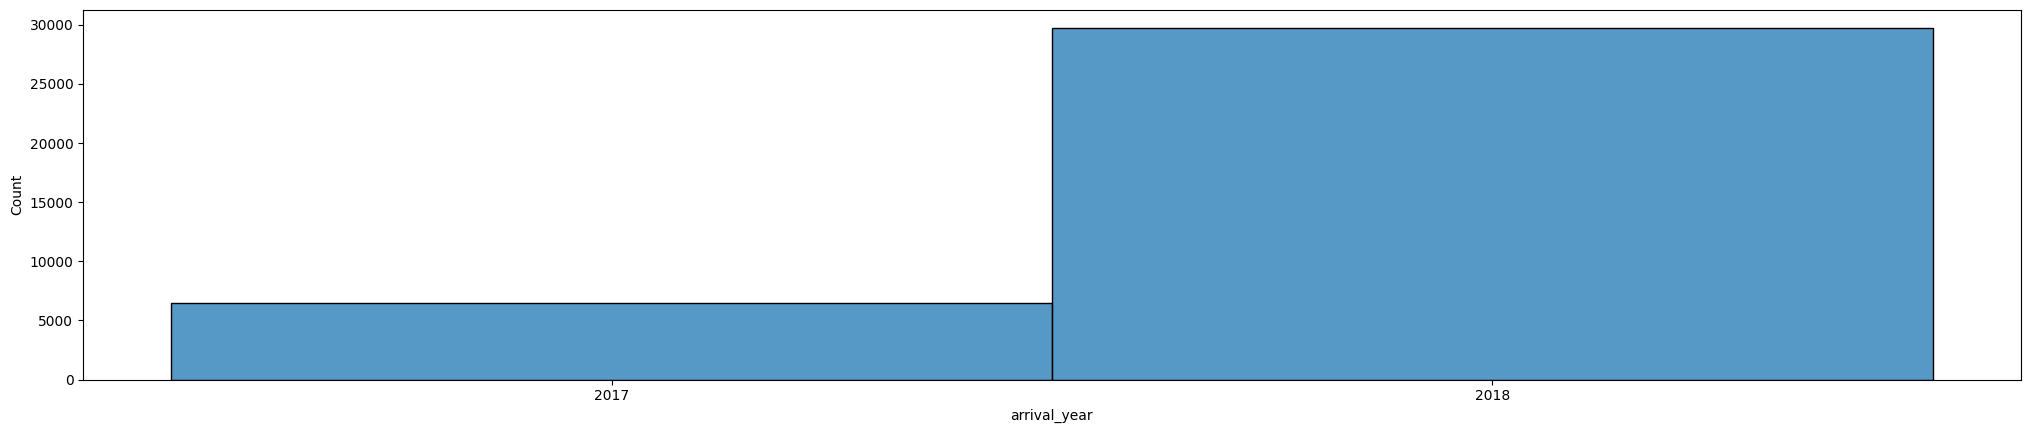

arrival_month
10    5317
9     4611
8     3813
6     3203
12    3021
11    2980
7     2920
4     2736
5     2598
3     2358
2     1704
1     1014
Name: arrival_month, dtype: int64


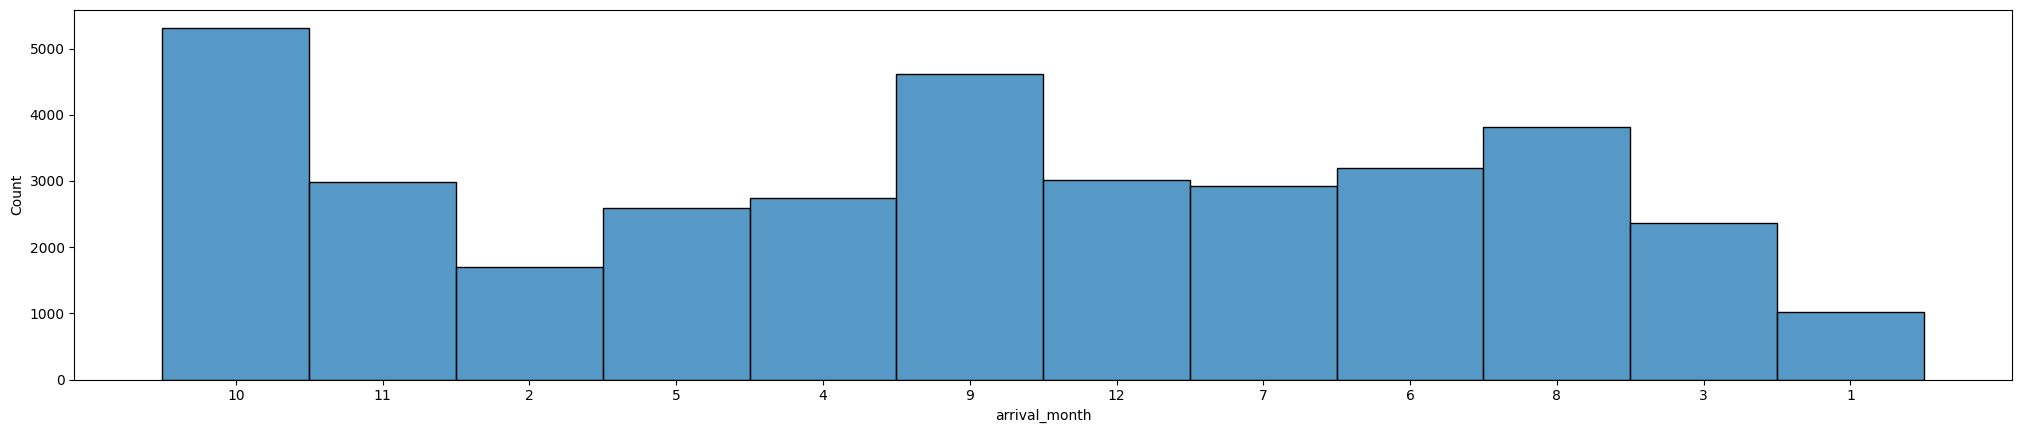

arrival_date
13    1358
17    1345
2     1331
4     1327
19    1327
16    1306
20    1281
15    1273
6     1273
18    1260
14    1242
30    1216
12    1204
8     1198
29    1190
21    1158
5     1154
26    1146
25    1146
1     1133
9     1130
28    1129
7     1110
24    1103
11    1098
3     1098
10    1089
27    1059
22    1023
23     990
31     578
Name: arrival_date, dtype: int64


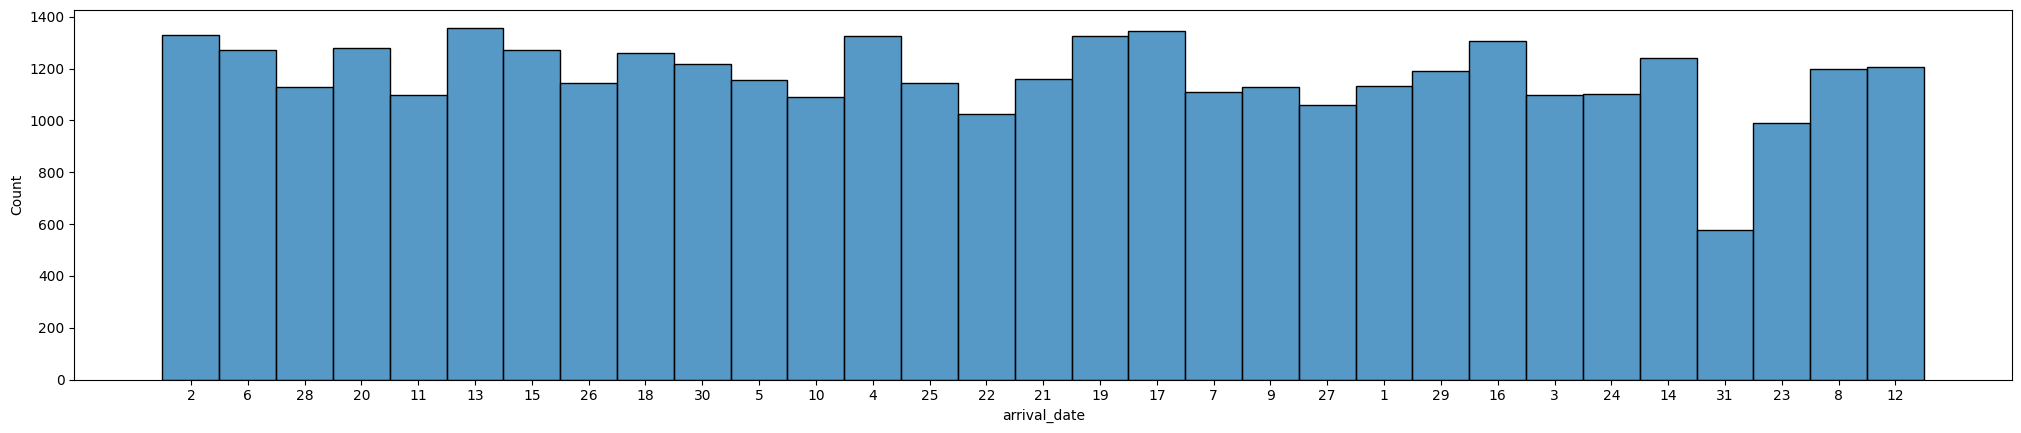

market_segment_type
Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: market_segment_type, dtype: int64


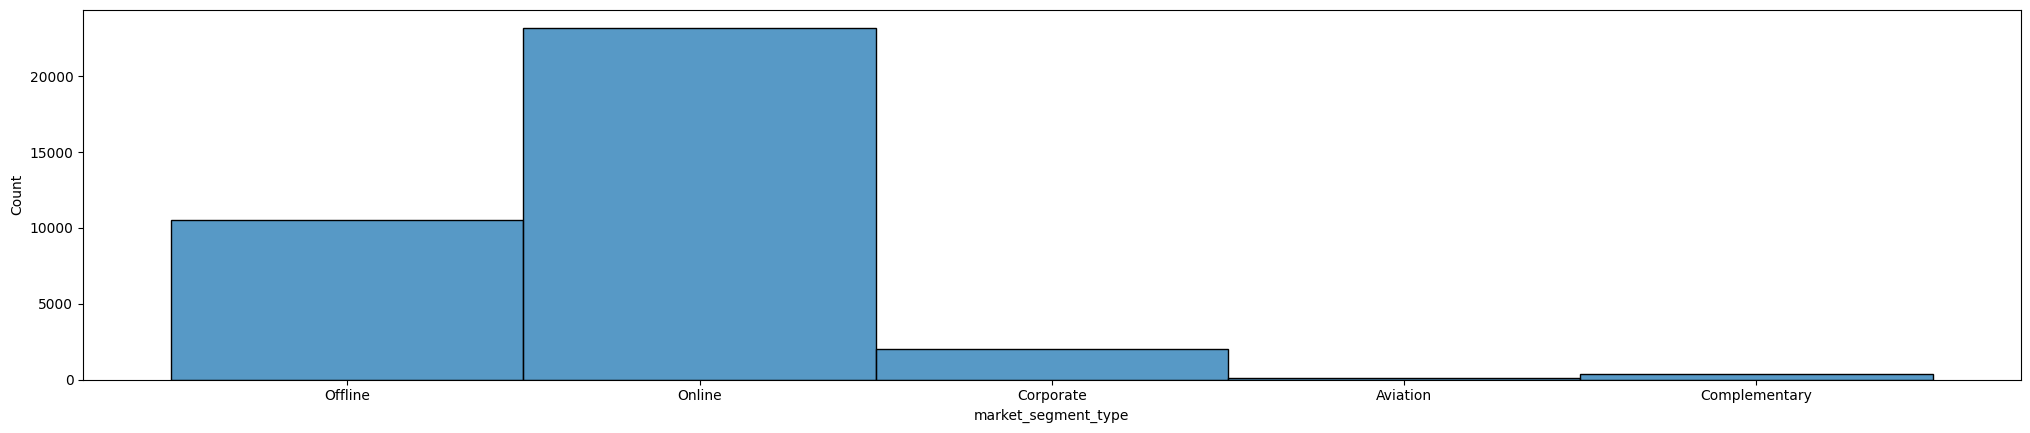

repeated_guest
0    35345
1      930
Name: repeated_guest, dtype: int64


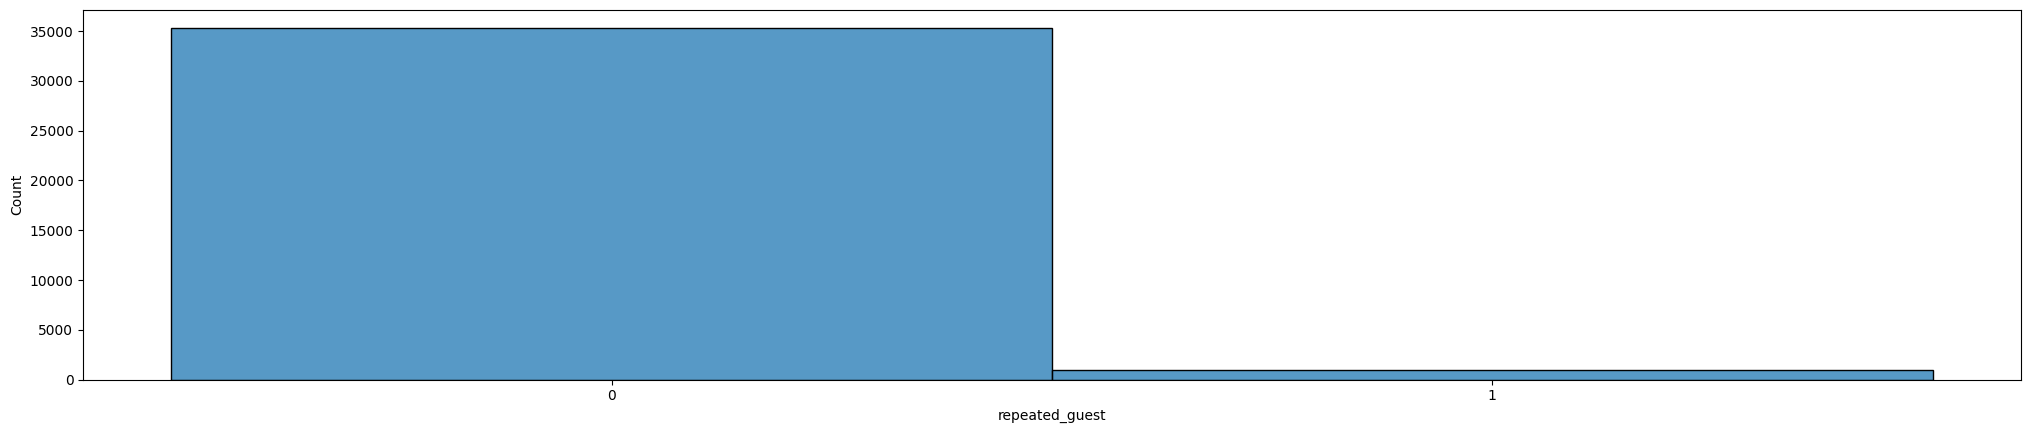

no_of_previous_cancellations
0     35937
1       198
2        46
3        43
11       25
5        11
4        10
13        4
6         1
Name: no_of_previous_cancellations, dtype: int64


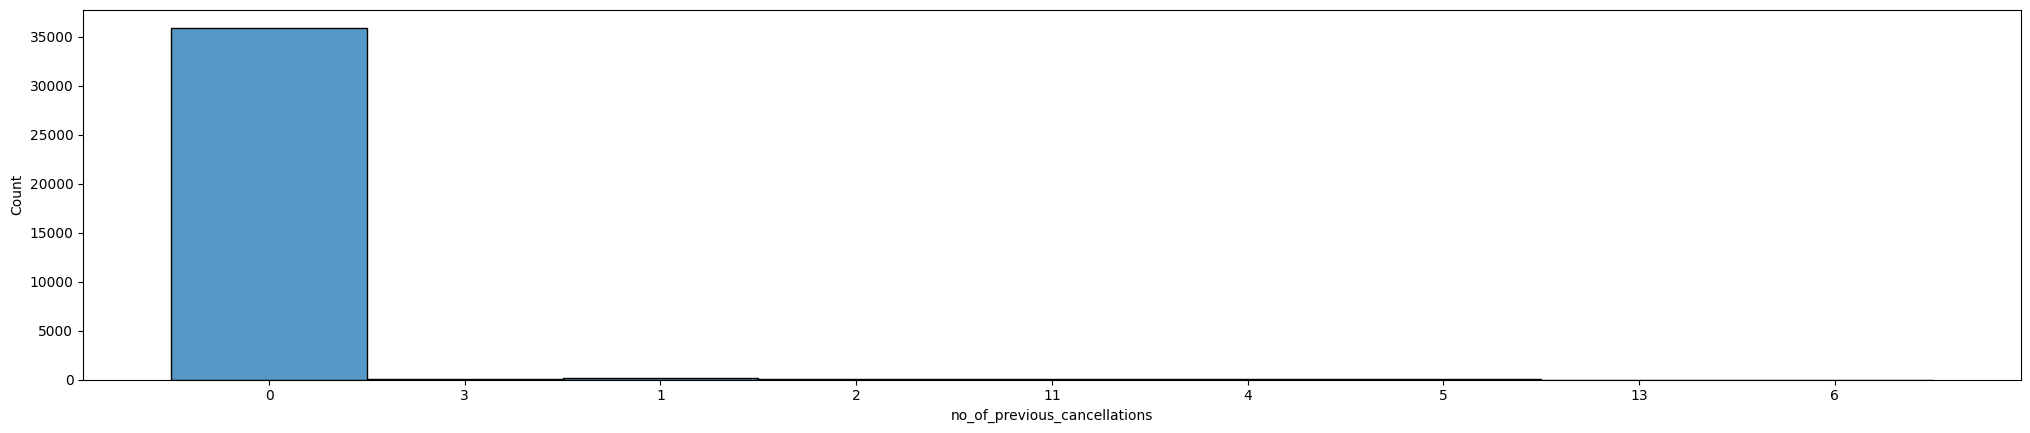

no_of_previous_bookings_not_canceled
0     35463
1       228
2       112
3        80
4        65
5        60
6        36
7        24
8        23
10       19
9        19
11       15
12       12
14        9
15        8
16        7
13        7
18        6
20        6
21        6
17        6
19        6
22        6
25        3
27        3
24        3
23        3
44        2
29        2
48        2
28        2
30        2
32        2
31        2
26        2
46        1
55        1
45        1
57        1
53        1
54        1
58        1
41        1
40        1
43        1
35        1
50        1
56        1
33        1
37        1
42        1
51        1
38        1
34        1
39        1
52        1
49        1
47        1
36        1
Name: no_of_previous_bookings_not_canceled, dtype: int64


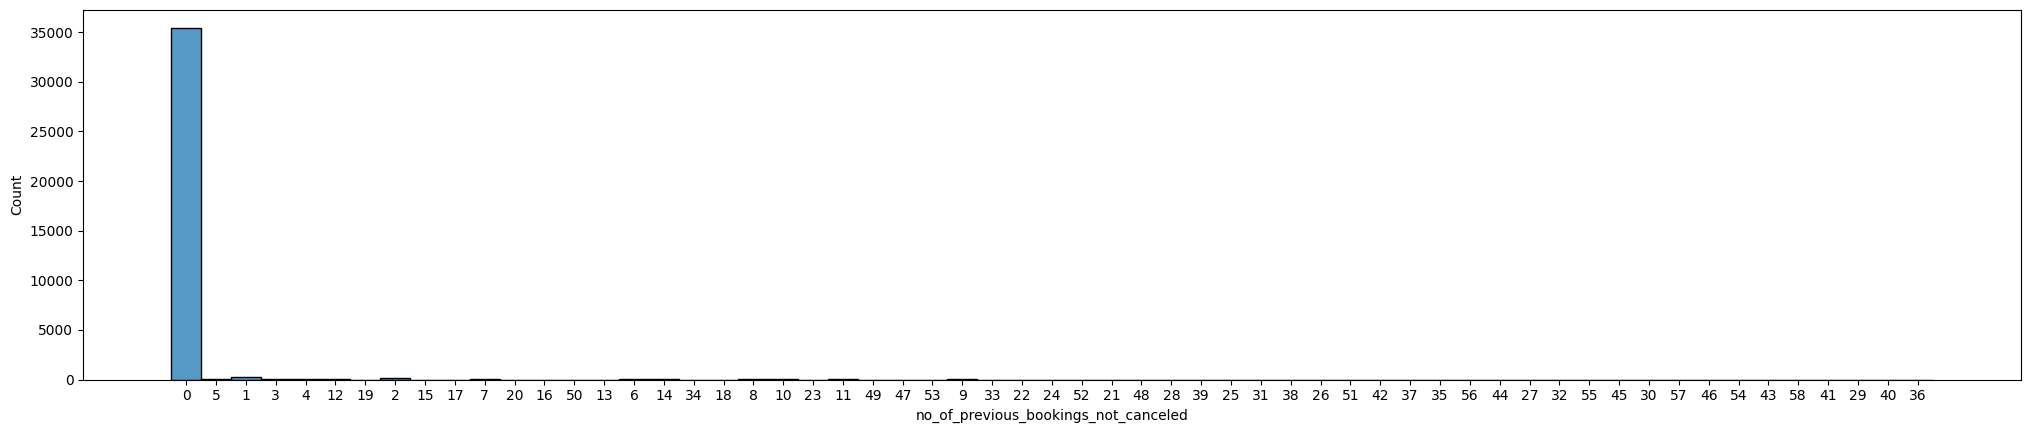

avg_price_per_room
65.0      848
75.0      826
90.0      703
95.0      669
115.0     662
         ... 
212.42      1
83.48       1
70.42       1
130.99      1
167.8       1
Name: avg_price_per_room, Length: 3930, dtype: int64


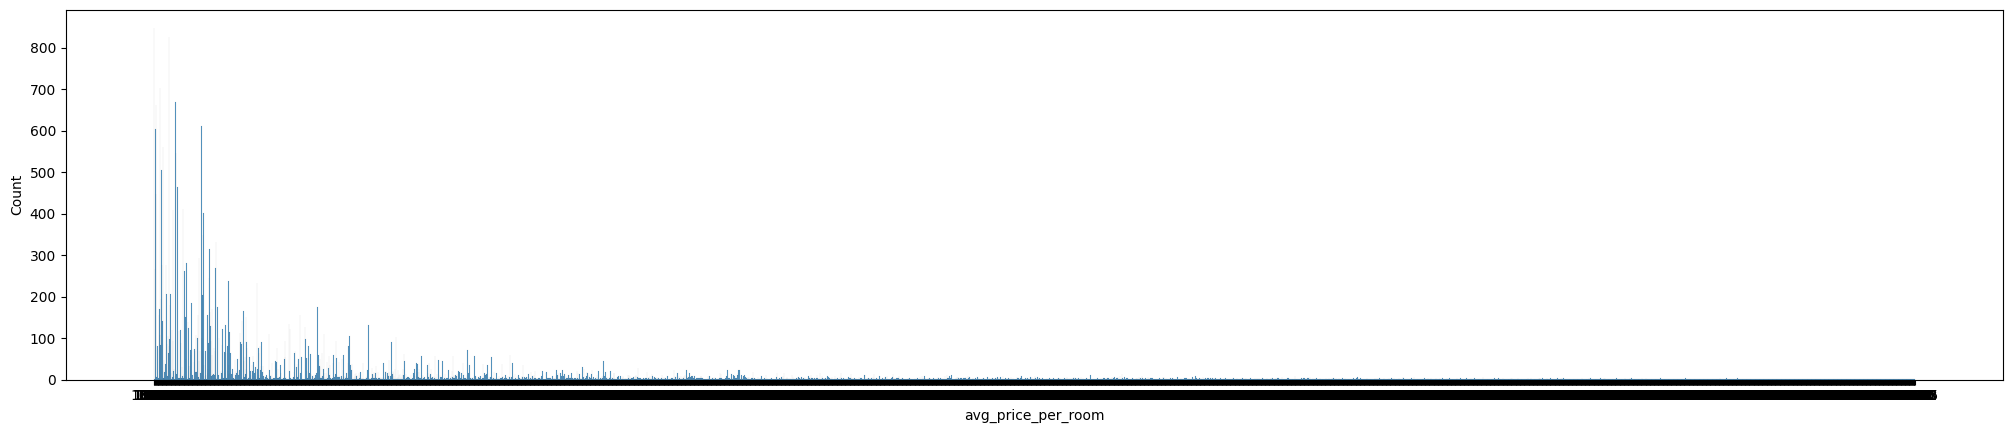

no_of_special_requests
0    19777
1    11373
2     4364
3      675
4       78
5        8
Name: no_of_special_requests, dtype: int64


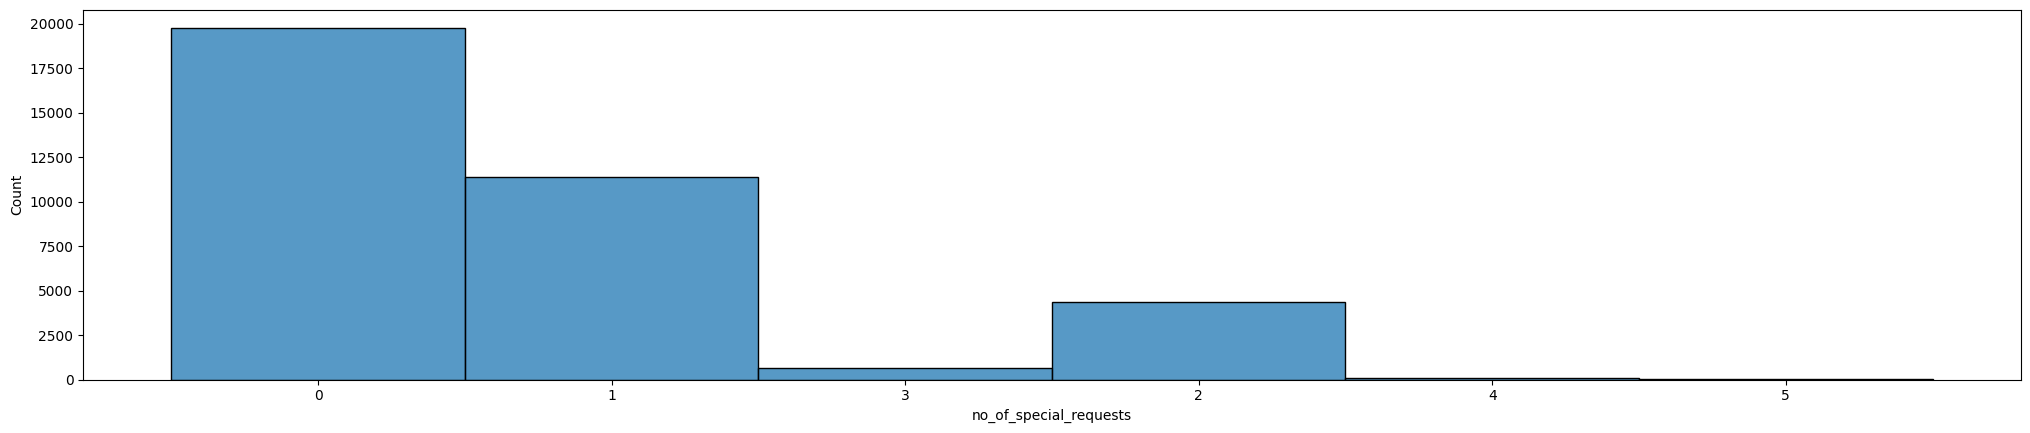

booking_status
Not_Canceled    24390
Canceled        11885
Name: booking_status, dtype: int64


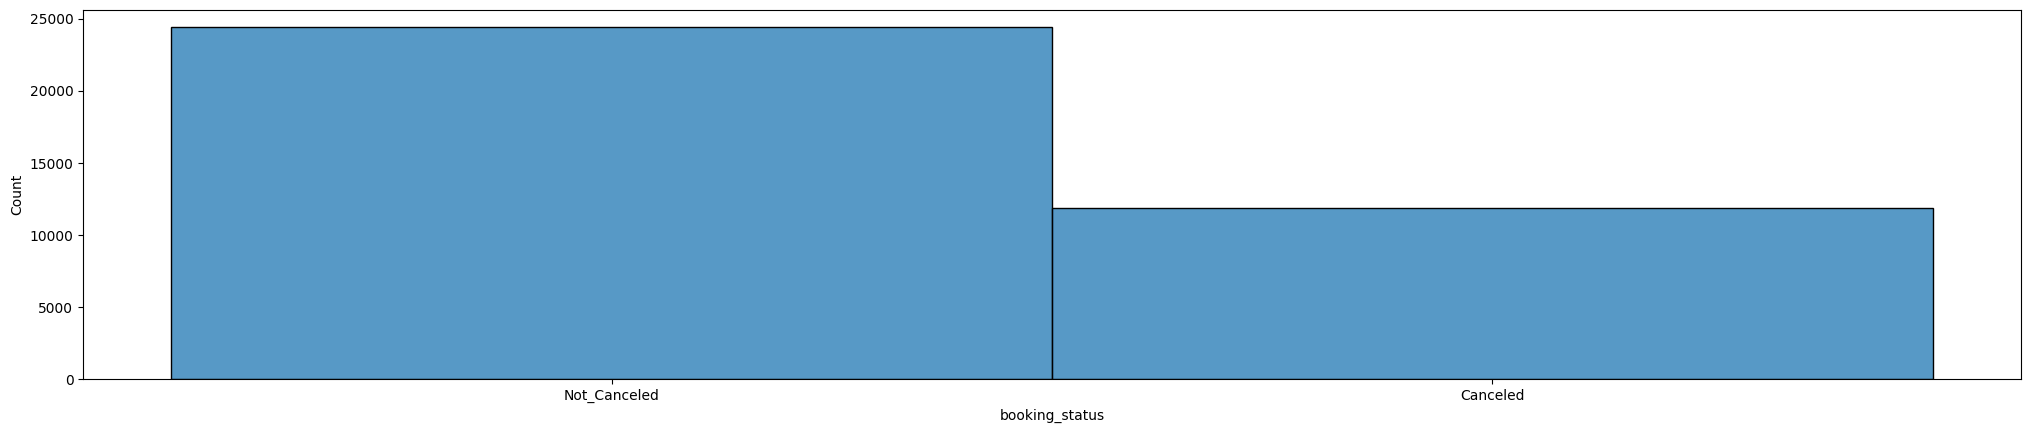

In [6]:
data = data.astype(str)

colunms = list(data.columns)
for c in colunms:
  if c != "Booking_ID":
    print(c)
    print(data[c].value_counts())
    plt.figure().set_figwidth(25)
    k = sns
    k.histplot(data = data[c])
    plt.show(k)


**Tiền** xử lí dữ liệu

In [5]:
le = preprocessing.LabelEncoder()
# Chuyển các giá trị không phải số sang dạng số
colunms = list(data.columns)
for c in colunms:
    data[c] = le.fit_transform(data[c])

X = data.drop(['booking_status', 'Booking_ID'], axis=1)
y = data['booking_status']

In [6]:
# Chia dữ liệu thành training set và testing set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

Cross - validation với KFold

In [9]:
kf = KFold(n_splits=10)

Tạo model

In [7]:
svm = SVC(kernel= 'linear')

Validation

In [ ]:
result = cross_val_score(svm , X_train, y_train, cv = kf)

Train model

In [ ]:
svm.fit(X_train, y_train)

Dự đoán

In [ ]:
y_pred = svm.predict(X_test)

Accuracy: 0.789


In [ ]:
print('Accuracy: %.3f' %accuracy_score(y_test, y_pred))

NameError: ignored